In [1]:
from apportionment import *
import powerlaw
import warnings

warnings.filterwarnings("ignore")

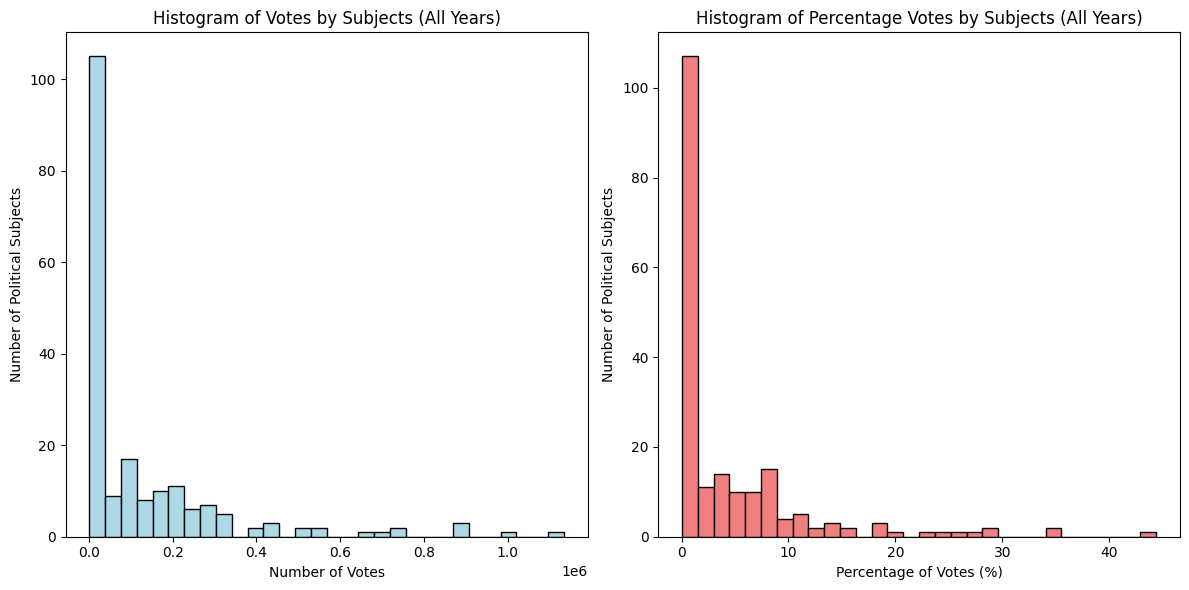

In [2]:
def read_election_data():
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

combined_data = read_election_data()

filtered_data = combined_data[combined_data["Subject Number"] > 0]


def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].hist(df["Valid Votes"], bins=30, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes')
    axes[0].set_ylabel('Number of Political Subjects')
    axes[0].set_title('Histogram of Votes by Subjects (All Years)')
    
    axes[1].hist(df["Percentage"], bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%)')
    axes[1].set_ylabel('Number of Political Subjects')
    axes[1].set_title('Histogram of Percentage Votes by Subjects (All Years)')
    
    plt.tight_layout()
    plt.show()

plot_histograms(filtered_data)


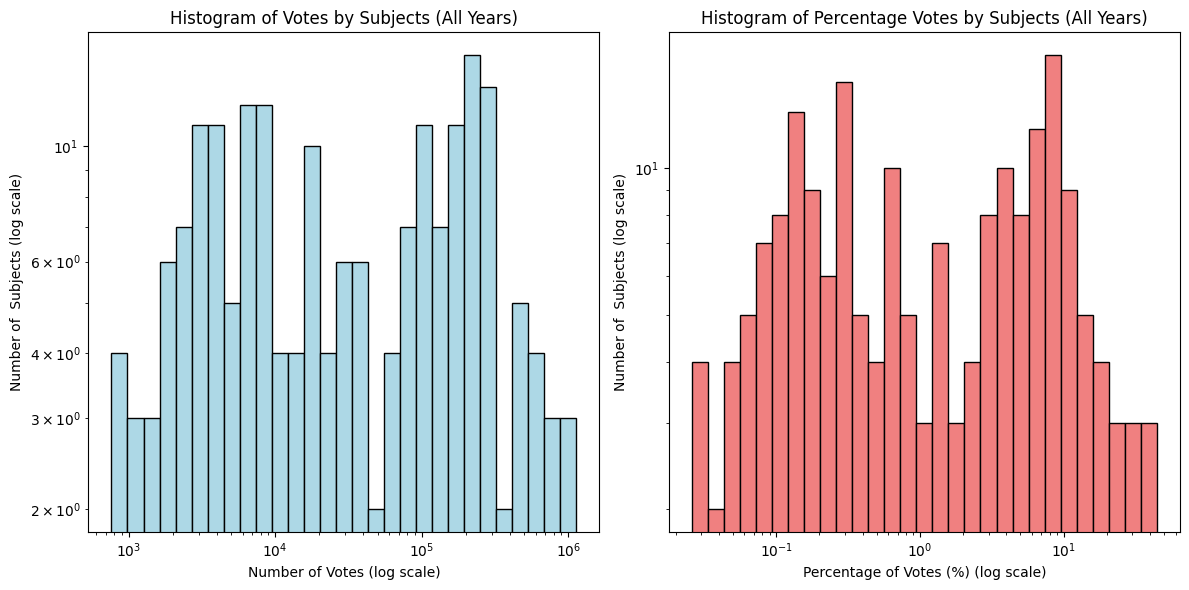

In [3]:
def read_election_data():
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

combined_data = read_election_data()

filtered_data = combined_data[combined_data["Subject Number"] > 0]

def plot_histograms(df):
    df["Total Voters"] = df["Year"].map(constants.all_voters)
    df["No Valid Votes"] = df["Year"].map(constants.no_valid_vote)
    df["Percentage"] = (df["Valid Votes"] / (df["Total Voters"] - df["No Valid Votes"])) * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    min_votes = df["Valid Votes"].min()
    max_votes = df["Valid Votes"].max()
    log_bins_votes = np.logspace(np.log10(min_votes), np.log10(max_votes), num=30)

    min_percentage = df["Percentage"].min()
    max_percentage = df["Percentage"].max()
    log_bins_percentage = np.logspace(np.log10(min_percentage), np.log10(max_percentage), num=30)
    
    axes[0].hist(df["Valid Votes"], bins=log_bins_votes, color='lightblue', edgecolor='black')
    axes[0].set_xlabel('Number of Votes (log scale)')
    axes[0].set_ylabel('Number of  Subjects (log scale)')
    axes[0].set_title('Histogram of Votes by Subjects (All Years)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    axes[1].hist(df["Percentage"], bins=log_bins_percentage, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Percentage of Votes (%) (log scale)')
    axes[1].set_ylabel('Number of  Subjects (log scale)')
    axes[1].set_title('Histogram of Percentage Votes by Subjects (All Years)')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    
    plt.tight_layout()
    plt.show()

plot_histograms(filtered_data)


In [4]:
def read_election_data():
    files = [(f'./real_data/NRSR{year}_clean.csv', year) for year in constants.years]
    all_data = []
    for file, year in files:
        df = pd.read_csv(file)
        df['Year'] = year
        all_data.append(df)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

combined_data = read_election_data()

filtered_data = combined_data[combined_data["Subject Number"] > 0]

# Function to calculate log-likelihood ratio and p-value for power law distribution
def calculate_powerlaw_stats(data):
    results = powerlaw.Fit(data)
    R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    return R, p

filtered_data["Total Voters"] = filtered_data["Year"].map(constants.all_voters)
filtered_data["No Valid Votes"] = filtered_data["Year"].map(constants.no_valid_vote)
filtered_data["Percentage"] = (filtered_data["Valid Votes"] / (filtered_data["Total Voters"] - filtered_data["No Valid Votes"])) * 100

valid_votes = filtered_data["Valid Votes"].values
R_votes, p_votes = calculate_powerlaw_stats(valid_votes)
print(f"Log-likelihood ratio (Votes): {R_votes}, p-value (Votes): {p_votes}")

percentages = filtered_data["Percentage"].values
R_percentage, p_percentage = calculate_powerlaw_stats(percentages)
print(f"Log-likelihood ratio (Percentage): {R_percentage}, p-value (Percentage): {p_percentage}")


Calculating best minimal value for power law fit
Log-likelihood ratio (Votes): -0.01390434542685579, p-value (Votes): 0.9889062949161802
Calculating best minimal value for power law fit
Log-likelihood ratio (Percentage): 0.20962105442990162, p-value (Percentage): 0.8339634456580058
